Data Frame Creation and EDA


In [1]:
import pandas as pd
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [2]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df['Quantity'].describe() # this is to calculate CV , if cv < 0.1 no or few ouliers
# if cv is between 0.1 and 1 then moderate and CV > 1 outliers , this calculation shwo spread of data
# Quantity Medium Dispertion

,Quantity
count,1000.000000
mean,5.510000
std,2.923431
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


In [4]:
df['Unit price'].describe() # Unit Price High Dispertion between CV 0.1 and 1 so Moderate

,Unit price
count,1000.000000
mean,55.672130
std,26.494628
min,10.080000
25%,32.875000
50%,55.230000
75%,77.935000
max,99.960000


In [5]:
df['Total'].describe() # cv = 0.761

,Total
count,1000.000000
mean,322.966749
std,245.885335
min,10.678500
25%,124.422375
50%,253.848000
75%,471.350250
max,1042.650000


In [8]:
df['cogs'].describe() , # cv = 0.762

,cogs
count,1000.00000
mean,307.58738
std,234.17651
min,10.17000
25%,118.49750
50%,241.76000
75%,448.90500
max,993.00000


In [9]:
df['gross income'].describe() # cv = 0.733

,gross income
count,1000.000000
mean,15.379369
std,11.708825
min,0.508500
25%,5.924875
50%,12.088000
75%,22.445250
max,49.650000


In [11]:
df['Rating'].describe() # cv = 0.167

,Rating
count,1000.00000
mean,6.97270
std,1.71858
min,4.00000
25%,5.50000
50%,7.00000
75%,8.50000
max,10.00000


In [12]:
# Numerical Test to see most important varibales for Target
print(df['Quantity'].corr(df['Total'],method='pearson'))
# Pearson value = 0.7 , total sales and quantity have strong relation

0.7055101859433066


In [13]:
print(df['Unit price'].corr(df['Total'],method='pearson'))
# Pearson value = 0.6 , total sales and Unit price have moderate relation

0.6339620885890689


In [14]:
print(df['cogs'].corr(df['Total'],method='pearson'))
# Pearson value = 0.9 , total sales and cogs have very strong relation


0.9999999999999998


In [15]:
print(df['gross income'].corr(df['Total'],method='pearson'))
# Pearson value = 0.9 , total sales and gross income have very strong relation


0.9999999999999999


In [17]:
print(df['Rating'].corr(df['Total'],method='pearson'))
# Pearson value = -0.03 , total sales and Rating have very weak relation

-0.03644170499701834


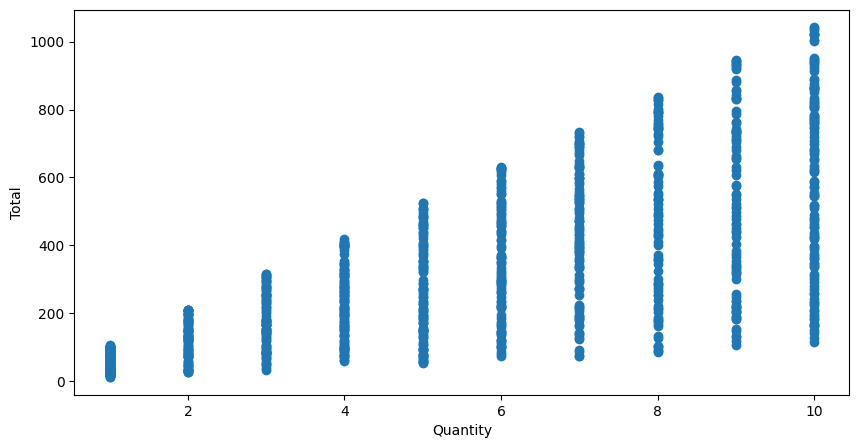

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(df['Quantity'],df['Total'])
plt.xlabel('Quantity')
plt.ylabel('Total')
plt.grid=(True)
plt.show()
# Linear Regression Between Quantity and Total

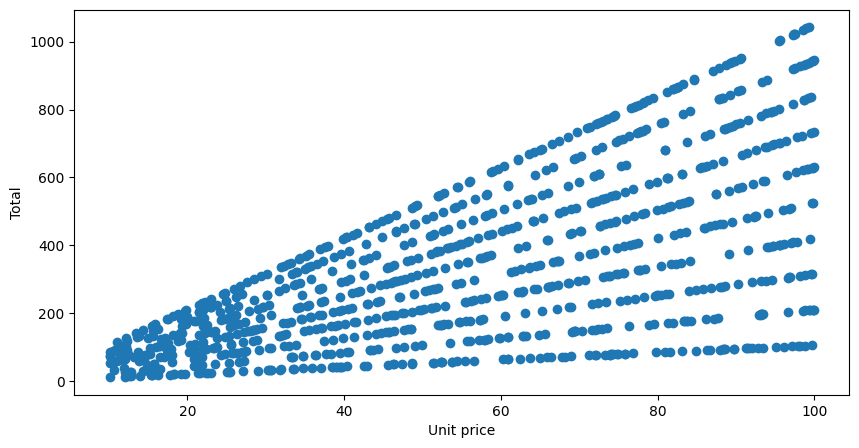

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(df['Unit price'],df['Total'])
plt.xlabel('Unit price')
plt.ylabel('Total')
plt.grid=(True)
plt.show()
# Heteroscedasity and fan distribution Between Unit price and Total

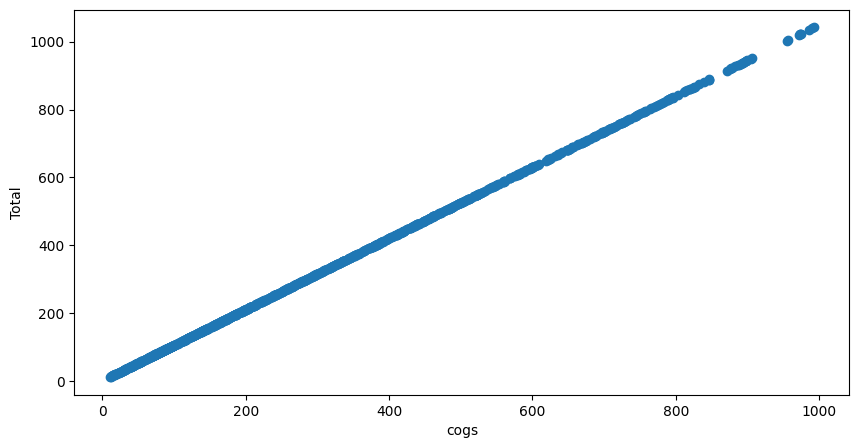

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(df['cogs'],df['Total'])
plt.xlabel('cogs')
plt.ylabel('Total')
plt.grid=(True)
plt.show()
# cogs and Total are in Linear Relation

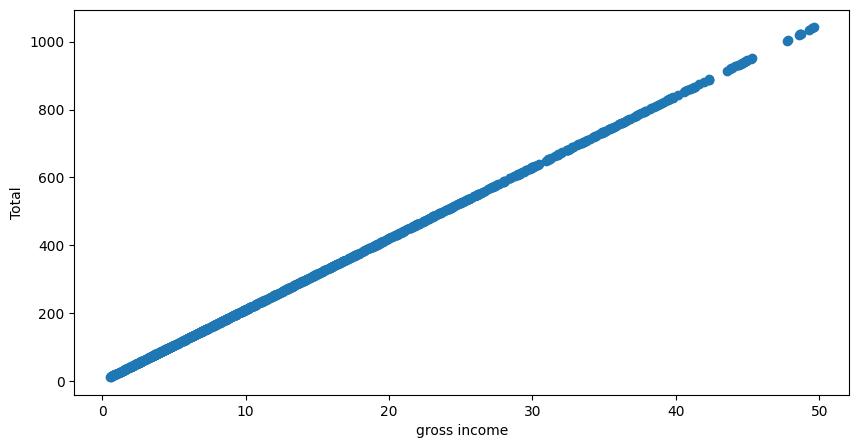

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(df['gross income'],df['Total'])
plt.xlabel('gross income')
plt.ylabel('Total')
plt.grid=(True)
plt.show()
# gross income and Total are in Linear Relation

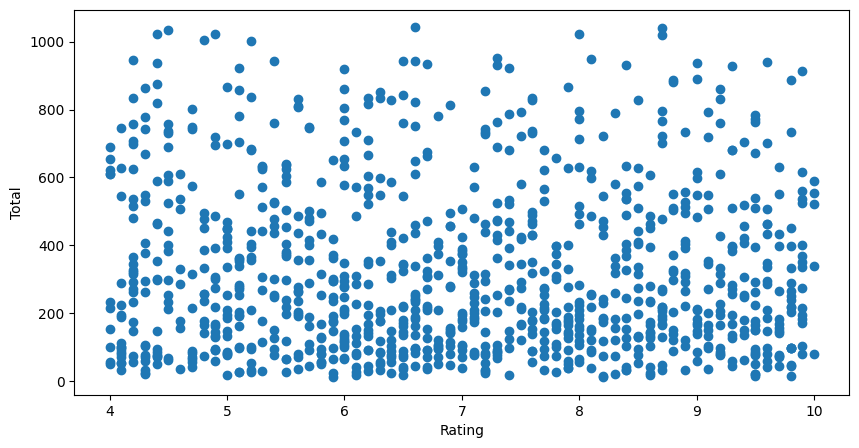

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(df['Rating'],df['Total'])
plt.xlabel('Rating')
plt.ylabel('Total')
plt.grid=(True)
plt.show()
# Rating and Total have weak relation

In [27]:
print(df['Rating'].corr(df['Quantity'],method='pearson'))

-0.01581490462716698


In [28]:
print(df['Rating'].corr(df['Unit price'],method='pearson'))


-0.008777507200778955


In [29]:
print(df['Rating'].corr(df['cogs'],method='pearson'))

-0.036441704997018334


In [30]:
print(df['Rating'].corr(df['gross income'],method='pearson'))


-0.03644170499701839


In [32]:
from scipy.stats import ttest_ind as t
R_Men = df[df['Gender']=='Male']['Rating']
R_Female = df[df['Gender']=='Female']['Rating']
t_stat , p_value = t(R_Men,R_Female)
print(p_value)


0.8794969800191749


In [34]:
from scipy.stats import f_oneway
groups = [group['Rating'].values for name, group in df.groupby('City')]
anova_result = f_oneway(*groups)
print(f"ANOVA result for City: F-value = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

ANOVA result for City: F-value = 2.0755, p-value = 0.1260


In [35]:
groups = [group['Rating'].values for name, group in df.groupby('Customer type')]
anova_result = f_oneway(*groups)
print(f"ANOVA result for Customer type: F-value = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

ANOVA result for Customer type: F-value = 0.3562, p-value = 0.5508


In [36]:
groups = [group['Rating'].values for name, group in df.groupby('Product line')]
anova_result = f_oneway(*groups)
print(f"ANOVA result for Product line: F-value = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

ANOVA result for Product line: F-value = 0.5399, p-value = 0.7461


In [37]:
groups = [group['Total'].values for name, group in df.groupby('Gender')]
anova_result = f_oneway(*groups)
print(f"ANOVA result for Gender and Total: F-value = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

ANOVA result for Gender and Total: F-value = 2.4465, p-value = 0.1181


In [38]:
groups = [group['Total'].values for name, group in df.groupby('City')]
anova_result = f_oneway(*groups)
print(f"ANOVA result for City and Total: F-value = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")


ANOVA result for City and Total: F-value = 0.8846, p-value = 0.4132


In [39]:
groups=[group['Total'].values for name, group in df.groupby('Customer type')]
anova_result = f_oneway(*groups)
print(f"ANOVA result for Customer type and Total: F-value = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")


ANOVA result for Customer type and Total: F-value = 0.3863, p-value = 0.5344


In [40]:
groups=[group['Total'].values for name, group in df.groupby('Product line')]
anova_result = f_oneway(*groups)
print(f"ANOVA result for Product line and Total: F-value = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

ANOVA result for Product line and Total: F-value = 0.3380, p-value = 0.8900


# Rating and Categorical Variables Didn't have any relation with model so we will build 2 models with and without them


In [41]:
df.isnull().sum() # no null values

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [42]:
df.info() # no incosistencies or missing values or any type error lets proceed to pre processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Pre-Processing


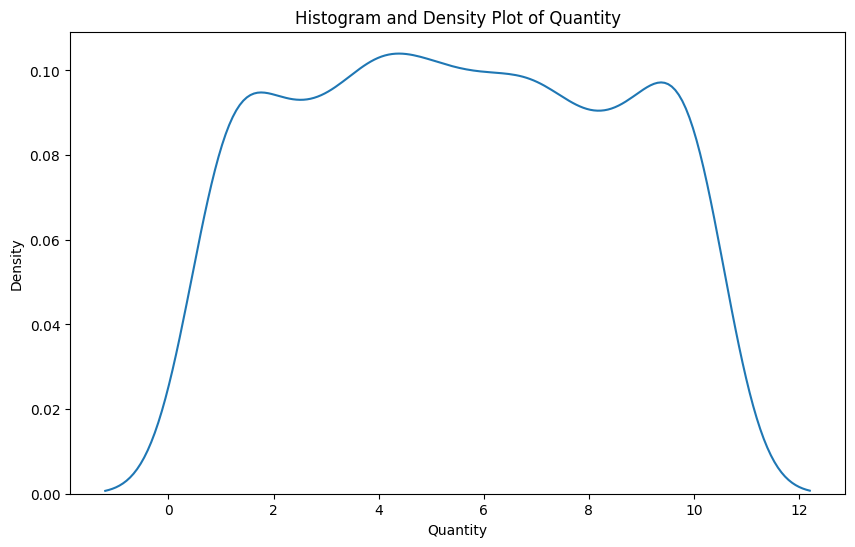

In [58]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Quantity'])
plt.title('Histogram and Density Plot of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.show()

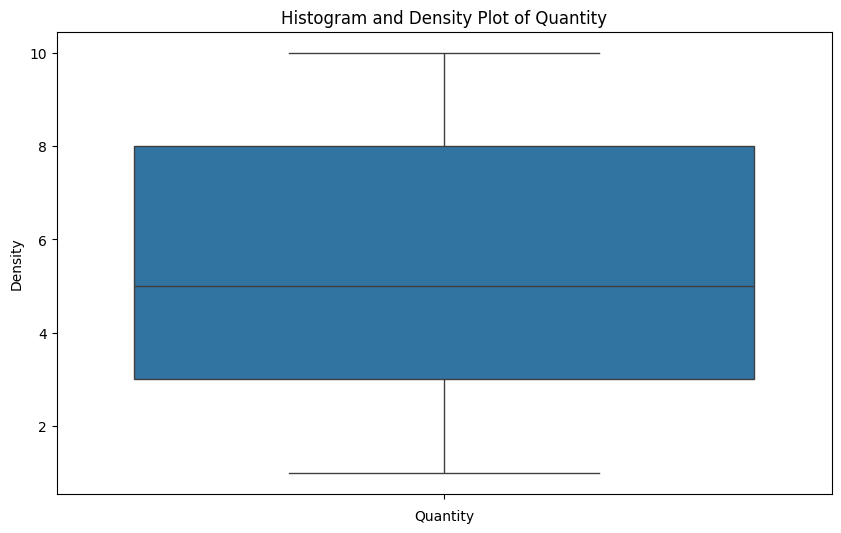

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Quantity'])
plt.title('Histogram and Density Plot of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler # no outliers
scaler = MinMaxScaler()
df['Quantity'] = scaler.fit_transform(df[['Quantity']])

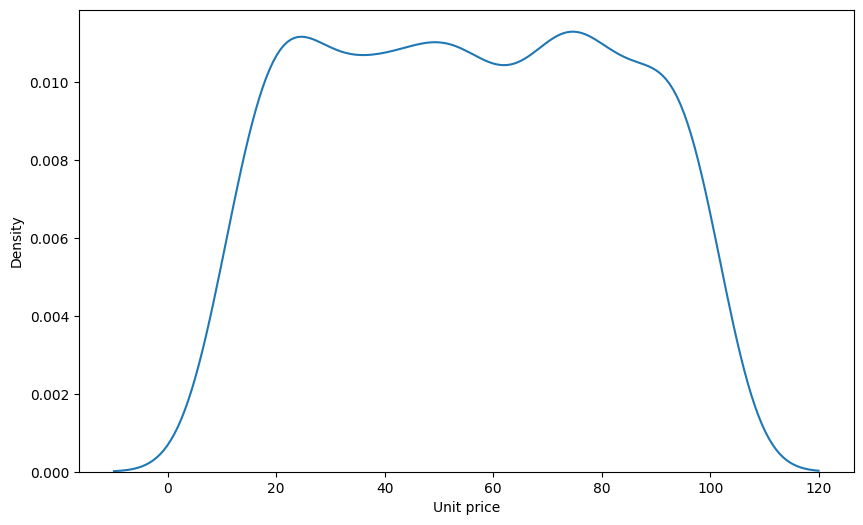

In [65]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Unit price'])
plt.xlabel('Unit price')
plt.ylabel('Density')
plt.show()

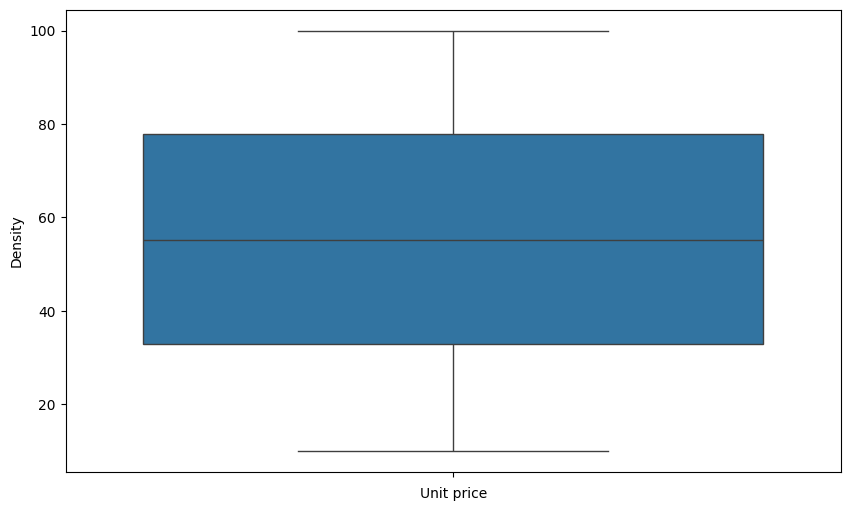

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Unit price'])
plt.xlabel('Unit price')
plt.ylabel('Density')
plt.show()

In [7]:
scaler = MinMaxScaler()
df['Unit price'] = scaler.fit_transform(df[['Unit price']])

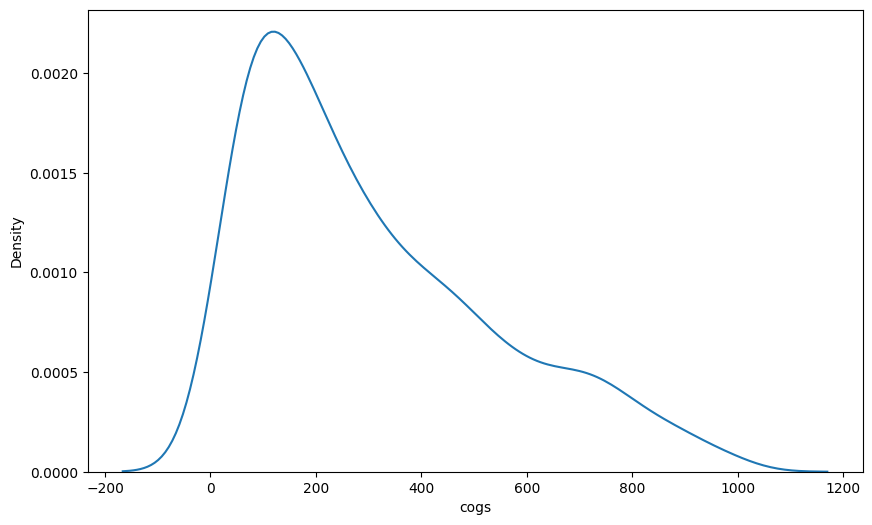

In [68]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['cogs'])
plt.xlabel('cogs')
plt.ylabel('Density')
plt.show()

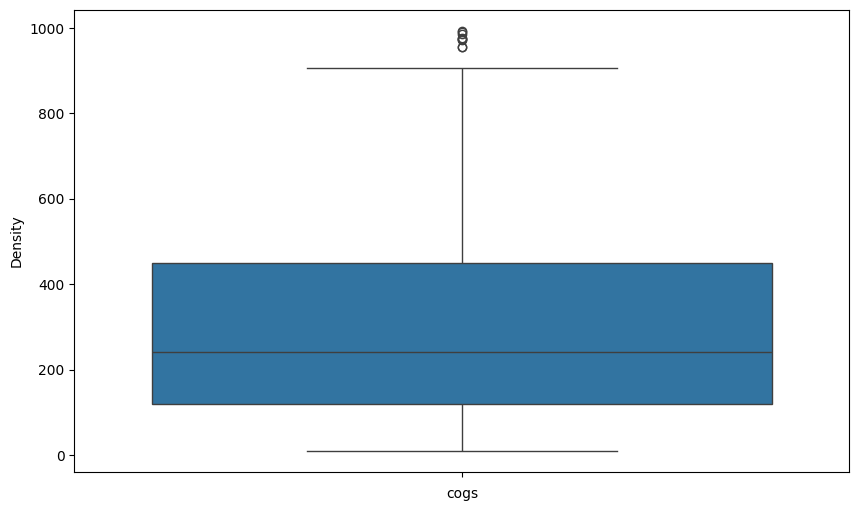

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['cogs'])
plt.xlabel('cogs')
plt.ylabel('Density')
plt.show()

In [8]:
s=df['cogs'].skew()
k=df['cogs'].kurt()
print(s,k)

0.8925698049581418 -0.08188475790435135


In [9]:
import numpy as np
df['cogs'] = np.log1p(df['cogs'])


In [10]:
df=pd.get_dummies(df,columns=['Gender','City','Customer type','Product line'])

In [11]:
df=pd.get_dummies(df,columns=['Branch'])

In [12]:
df.head()

,Invoice ID,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,...,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Branch_A,Branch_B,Branch_C
0,750-67-8428,0.718847,0.666667,26.1415,548.9715,1/5/2019,13:08,Ewallet,6.261167,4.761905,...,False,False,False,False,True,False,False,True,False,False
1,226-31-3081,0.057855,0.444444,3.8200,80.2200,3/8/2019,10:29,Cash,4.348987,4.761905,...,True,True,False,False,False,False,False,False,False,True
2,631-41-3108,0.403316,0.666667,16.2155,340.5255,3/3/2019,13:23,Credit card,5.784779,4.761905,...,True,False,False,False,False,True,False,True,False,False
3,123-19-1176,0.535603,0.777778,23.2880,489.0480,1/27/2019,20:33,Ewallet,6.145815,4.761905,...,False,False,False,False,True,False,False,True,False,False
4,373-73-7910,0.848131,0.666667,30.2085,634.3785,2/8/2019,10:37,Ewallet,6.405509,4.761905,...,True,False,False,False,False,False,True,True,False,False


In [13]:
df.drop(columns=['Invoice ID','Date','Time','Payment','gross income','Tax 5%','gross margin percentage','Rating'],inplace=True)

In [81]:
df.drop(columns=['Total'],inplace=True)


In [14]:
df.head()

,Unit price,Quantity,Total,cogs,Gender_Female,Gender_Male,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Branch_A,Branch_B,Branch_C
0,0.718847,0.666667,548.9715,6.261167,True,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False
1,0.057855,0.444444,80.2200,4.348987,True,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True
2,0.403316,0.666667,340.5255,5.784779,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False
3,0.535603,0.777778,489.0480,6.145815,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False
4,0.848131,0.666667,634.3785,6.405509,False,True,False,False,True,False,True,False,False,False,False,False,True,True,False,False


In [20]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
x = df.drop(columns=['Total'])
y = df['Total']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {np.mean(cv_rmse_scores):.4f}")
print(f"Standard Deviation of CV RMSE: {np.std(cv_rmse_scores):.4f}")

Mean Squared Error: 2.074084219785323
RMSE: 1.4402
R²: 1.0000
Cross-Validation RMSE Scores: [1.6510882  1.61467452 1.47323382 1.44326896 1.74823616]
Mean CV RMSE: 1.5861
Standard Deviation of CV RMSE: 0.1135


In [23]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation RMSE: {best_score:.4f}")

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

# Predict on the test set
y_pred = best_model.predict(x_test)

# Calculate RMSE and R² for the test set
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation RMSE: 2.5749
Test RMSE: 1.3752
Test R²: 1.0000
